In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
# Đọc dữ liệu từ tập tin CSV với các tùy chọn
df = pd.read_csv('SONY.csv', header=0, parse_dates=[0], index_col=0)
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index
# In ra 5 dòng đầu tiên của DataFrame
df


,Price,Open,High,Low,Vol.,Change %
0,45.79,45.44,45.81,45.24,844.22K,1.87%
1,46.30,45.93,46.36,45.90,613.23K,1.11%
2,47.25,46.81,47.26,46.80,770.67K,2.05%
3,48.70,48.18,48.79,48.17,1.36M,3.07%
4,49.00,48.80,49.01,48.73,618.86K,0.62%
...,...,...,...,...,...,...
1490,85.32,85.27,85.53,84.62,1.03M,-0.95%
1491,86.40,85.88,86.69,85.86,811.89K,1.27%
1492,88.40,89.00,89.54,88.40,2.17M,2.31%
1493,88.51,87.98,88.62,87.37,850.75K,0.12%


In [14]:
# 2.  chia train test validate theo tỉ lệ 9:1
# Split the data into training, testing
train_size = int(0.9 * len(df))
test_size = int(0.1 * len(df))


X2D = df[['High']] # Biến độc lập theo mảng 2 chiều
Y2D = df[['Price']] # Biến phụ thuộc theo mảng 2 chiều



In [15]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

y_train = Y2D[:train_size]
x_train = X2D[:train_size]
y_test = Y2D[train_size:]
x_test = X2D[train_size:]
y_train_index = y_train.index # lấy ra index trước khi đổi nó về mảng 2 chiều ( phục vụ plot )
y_train = Y2D[:train_size].values.ravel()

# Tạo mô hình SVR với kernel RBF
model = SVR(kernel='rbf')
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],             # Ví dụ các giá trị cho C
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],  # Ví dụ các giá trị cho gamma
    'epsilon': [0.001, 0.01, 0.1, 1, 10]      # Ví dụ các giá trị cho epsilon
}

# Tạo đối tượng GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Huấn luyện mô hình sử dụng grid search
svr_rbf = grid_search.fit(x_train,y_train)

# In ra kết quả tốt nhất
print("Best parameters:", grid_search.best_params_)
print("Best score:", -grid_search.best_score_)


Best parameters: {'C': 1000, 'epsilon': 1, 'gamma': 0.001}
Best score: 0.8410890456227935


In [16]:


y_pred = svr_rbf.predict(x_test)
y_pred


array([91.42125094, 93.00709207, 92.43837931, 92.52816139, 94.25498401,
       94.0352901 , 93.17674984, 94.80432416, 98.06219939, 97.40253319,
       97.40253319, 94.48469052, 93.85555997, 94.464715  , 95.54363906,
       95.13399293, 93.40631602, 95.95333868, 97.77234897, 98.0122257 ,
       99.15152928, 97.71237917, 96.32310398, 97.96225177, 98.46197791,
       99.85095075, 99.800997  , 98.66185791, 97.57244902, 95.92335909,
       94.34486602, 92.98713356, 90.41484117, 90.0861747 , 89.30962833,
       90.4746071 , 89.23000561, 89.71776119, 91.01261829, 90.69377116,
       89.76754126, 90.78343934, 89.79741012, 89.32953467, 91.45115573,
       93.04700986, 92.13914659, 93.20669137, 94.33487893, 93.91546801,
       92.77758515, 92.87736646, 92.83745314, 92.70774222, 92.98713356,
       94.10518993, 93.0869287 , 93.27655715, 92.83745314, 91.10230757,
       89.13048301, 90.28535721, 89.64807197, 89.50870349, 89.23995823,
       85.94843853, 84.74596047, 82.96683389, 82.68845094, 82.15

In [17]:
last_row = df.tail(1)
last_data = last_row['Price'].values.reshape(-1,1)
last_data

array([[89.3]])

In [18]:
# tạo mảng chứa giá trị predict của 30 ngày tiếp theo
x_next_30_days = []
# predict giá Close 30 ngày tiếp theo dựa vào giá Close của ngày trước đó
for i in range(30):
    x_pred_next = svr_rbf.predict(last_data)
    x_next_30_days.append(x_pred_next)
    last_data = x_pred_next.reshape(-1,1)
x_next_30_days

[array([88.23505316]),
 array([87.17606276]),
 array([86.1234191]),
 array([85.07730167]),
 array([84.03767262]),
 array([83.00428663]),
 array([81.97671467]),
 array([80.95437859]),
 array([79.93659299]),
 array([78.92261103]),
 array([77.91167097]),
 array([76.9030406]),
 array([75.89605711]),
 array([74.89016006]),
 array([73.88491542]),
 array([72.88002899]),
 array([71.87534771]),
 array([70.87084833]),
 array([69.86661325]),
 array([68.86279475]),
 array([67.85956985]),
 array([66.85708893]),
 array([65.85542267]),
 array([64.85451193]),
 array([63.85412601]),
 array([62.85383422]),
 array([61.85299574]),
 array([60.85077236]),
 array([59.84616872]),
 array([58.8381052])]

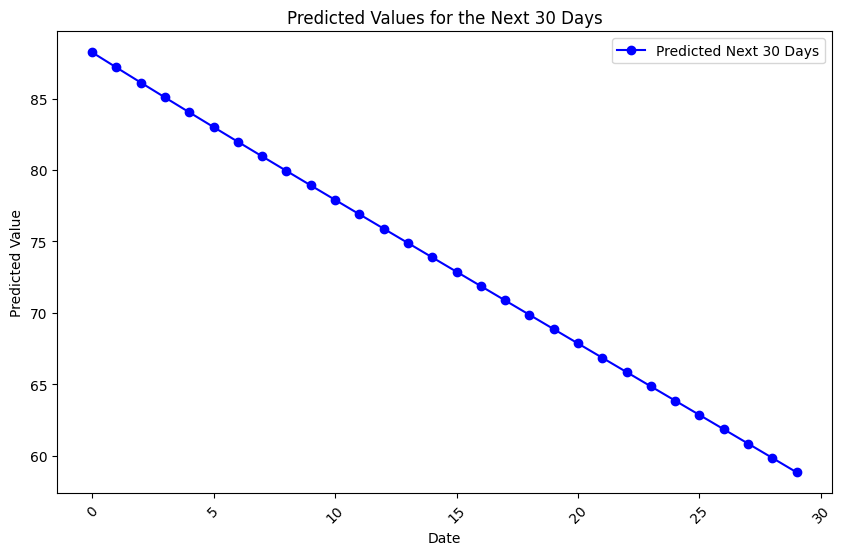

In [19]:

# Vẽ biểu đồ
plt.figure(figsize=(10, 6)) # Set the figure size
plt.plot(x_next_30_days, marker='o', color='b', label='Predicted Next 30 Days')

# Đặt tiêu đề và nhãn
plt.title('Predicted Values for the Next 30 Days')
plt.xlabel('Date')
plt.ylabel('Predicted Value')
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.legend()

# Hiển thị biểu đồ
plt.show()

In [20]:
# Chuyển cột predict price thành mảng 2 chiều
y_pred = y_pred.reshape(-1,1)

In [21]:
from sklearn.metrics import mean_absolute_percentage_error,mean_absolute_error
# 7. Đánh giá độ chính xác test bằng RMSE, MAE , MAPE
# RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)
# MAPE
test_mape = mean_absolute_percentage_error(y_test,y_pred)
print('Testing MAPE:', test_mape)
# MAE
test_mae = mean_absolute_error(y_test,y_pred)
print('Testing MAE:', test_mae)

Testing RMSE: 0.8004859813019464
Testing MAPE: 0.006942142631755086
Testing MAE: 0.6105449409664956


In [22]:
# Tạo index cho 30 ngày tiếp theo
last_index =  df.index[-1]
next_30_dates = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

Testing RMSE: 0.8004859813019464
Testing MAPE: 0.006942142631755086
Testing MAE: 0.6105449409664956


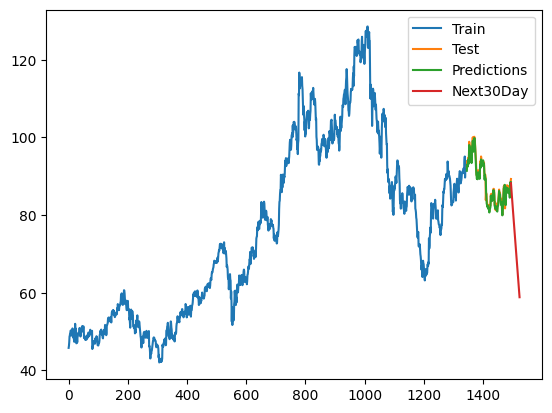

In [23]:
# 8. Tính RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)
# MAPE
test_mape = mean_absolute_percentage_error(y_test,y_pred)
print('Testing MAPE:', test_mape)
# MAE
test_mae = mean_absolute_error(y_test,y_pred)
print('Testing MAE:', test_mae)

# 9.Vẽ hình

plt.plot(y_train_index, y_train)
plt.plot(y_test.index, y_test)
plt.plot(y_test.index, y_pred)
plt.plot(next_30_dates,x_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()